# Predicting the Survival of Titanic Passengers

## Introduction

#### Titanic, launched on May 31, 1911, and set sail on its maiden voyage from Southampton on April 10, 1912, with 2,240 passengers and crew on board. On April 15, 1912, after striking an iceberg, Titanic broke apart and sank to the bottom of the ocean, taking with it the lives of more than 1,500 passengers and crew.

## Problem Statement

#### We have sample data listing passengers who survived or did not survive in Titanic disaster.
#### Based on a given test data, can our model predict whether the passengers listed in test data survived or not

## Source of Dataset

#### We collected the dataset from Kaggle.com



## Size of Dataset

#### Size of Titanic dataset is 59KB

## About the Dataset

#### Titanic Dataset contains a sample of data giving an overview of the passengers who survived or did not survive during Titanic disater.
#### Dataset contains 12 columns namely - 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

## Libraries Used
#### Numpy
#### Pandas
#### Matplotlib
#### Seaborn
#### Sklearn

## Categories
#### In this dataset, we have both categorical and non-categorical features.
### Categorical Columns
#### Features Sex and Survived has two possible values
#### Feature Embarked and Pclass has three possible values
### Non-Categorical Columns
#### Below Features are non-categorical:
#### PassengerId,Age,Name,Sibsp,Parch,Cabin,Ticket,Fare  ddtype: int64
   dtype: int64

## Overview of the Features

#### Survived- Shows whether a particular passenger survived or not. It contains binary data where 0- Not survived and 1- Survived.

#### Pclass- The passengers could opt from three distinct classes, namely class-1, class-2, class-3. 

#### Sex- This feature tells about the percentage of Male and female passengers. The percentage of female survivors was higher than the number of male survivors. 

#### Age -This feature gives us an overview of Age range of all the passengers.

#### SibSp- SibSp is the number of siblings or spouse of a person onboard. A maximum of 8 siblings and spouses traveled along with one of the traveler. 

#### Parch-Similar to the SibSp, this feature contains number of parents/children the passengers are travelling with.

#### Fare- Fare that passengers paid for tickets.

#### Embarked- Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.




## Prediction Algorithm used:
#### Logistic Regression
#### Decision tree Classifier

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

In [8]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C


## Various features in Titanic dataset

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Type of each feature in dataset

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Checking values of each column

In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
df['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [14]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [15]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [16]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [17]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [18]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [19]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [20]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Checking Missing values

In [22]:
(df.isnull().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Checking Missing Values

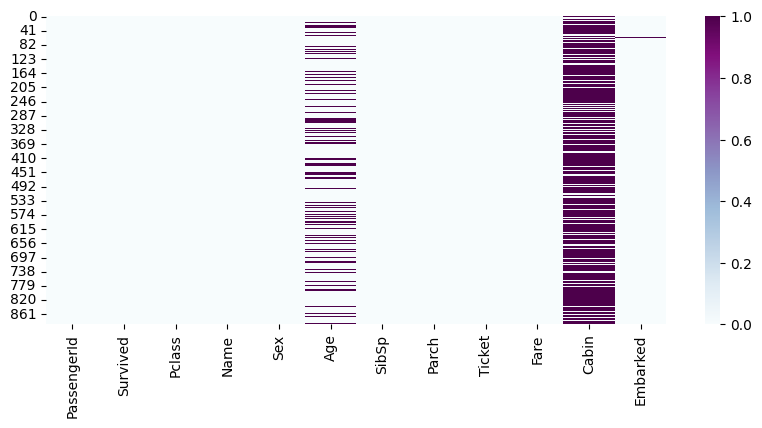

In [23]:
f = plt.figure(figsize=(10,4))
h = sns.heatmap(df.isnull(),cbar=True,cmap='BuPu')

In [24]:
(df.isnull().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### We can see from above:
  ##### There are missing data in the columns Age, Cabin and Embarked.
  ##### We will drop Column Cabin as 77% of data is missing.
  ##### We will replace missing values of Age column with Median of Age column as missing data is less than 50%.
  ##### We will drop remaining missing values row wise.

# Handling missing values and duplicates


## Dropping columns
#### I dropped the columns that I did not need for the prediction.
#### I dropped columns Cabin, Name, PassengerId and Ticket.
#### We will drop column Ticket as there are different types of data


In [25]:

df.drop(['Cabin','Ticket','Name'],axis=1,inplace=True)

#### Cabin- As the column ‘Cabin’ had a lot of missing data- around 77%. So I decided to drop the column.

### Replacing missing values of Age column with median

In [26]:
df['Age'].fillna(df['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### Data imputation is the practice of replacing missing data with some substituted values.I used this method to handle missing data of Age column.

#### Age- As Age column had 19% missing data. So I replaced the missing values of Age column with Median of Age.

### Dropping missing values row wise

In [27]:
df.dropna(axis=0,inplace=True)

#### Embarked column had 0.23% of missing data. So to handle this,I dropped remianing missing data of the entire dataframe rowwise

### Checking missing values

In [28]:
(df.isnull().sum()/len(df))*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

### checking duplicate values

In [29]:
df.duplicated().sum()

0

* There are no duplicate values in this dataset

### Below are the Remaining columns after handling missing values.

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

### Handling Categorical columns
## Encoding
#### Since the string data does not go well with the machine learning algorithms, I need to convert the non-numeric data to numeric data.
#### Checked number of unique values for each category in column Sex.
  
* Replace values of Sex column with 0 and 1
    * Male=0 Female=1

       

In [31]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})

### Checking percentage of each value in column Embarked

In [32]:
df['Embarked'].value_counts(normalize=True)*100

Embarked
S    77.808989
C    18.258427
Q     3.932584
Name: proportion, dtype: float64

### Dropping Embarked column value Q

In [33]:

df.drop(df[df['Embarked']=='Q'].index,inplace=True)

### Replacing values of Embarked column with 0 and 1

In [34]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1})

In [35]:
df.drop('PassengerId',axis=1,inplace=True)

In [36]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Exploratory Data Analysis

## No of passengers survived

In [37]:
df['Survived'].value_counts(normalize=True)*100

Survived
0    59.064327
1    40.935673
Name: proportion, dtype: float64

* Around 41% of passengers survived and 59% passengers did not survive

## Survival rate of Male and Female

In [38]:
df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
0,0,0.210526
1,1,0.761134


<Axes: xlabel='Sex', ylabel='count'>

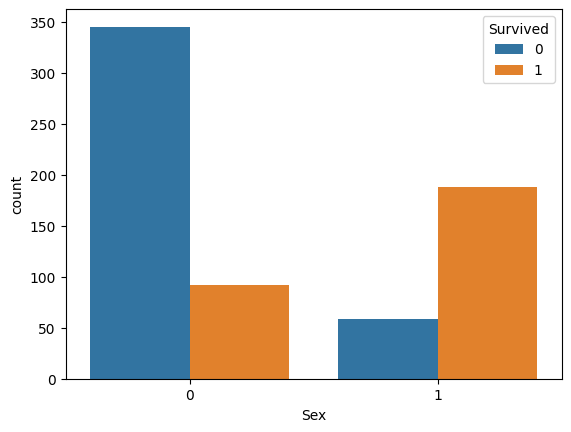

In [39]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

From the above graph we can conclude that Survival rate of Female passengers is more than Male passengers

## Survival rate of Passengers based on number of Sibling/Spouse

In [40]:
df[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.533333
2,2,0.458333
0,0,0.369710
3,3,0.333333
4,4,0.214286
5,5,0.000000


<Axes: xlabel='SibSp', ylabel='count'>

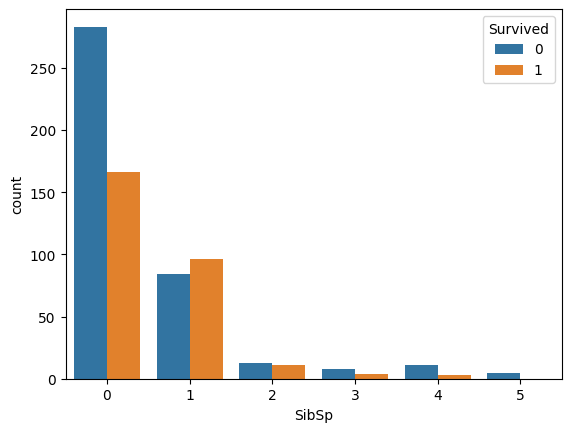

In [41]:
sns.countplot(x=df['SibSp'], hue=df['Survived'])

* From the above graph, we can conclude that passengers having 5 siblings has 0 survival rate whereas Passenger having 1 sibling has highest survival rate.

## Relation between Parents children and Survived column

In [42]:
df[['Parch', 'Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.586538
2,2,0.573529
0,0,0.353414
5,5,0.250000
4,4,0.000000
6,6,0.000000


<Axes: xlabel='Parch', ylabel='count'>

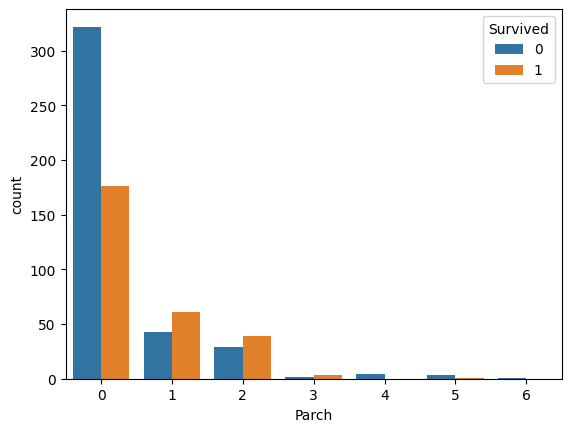

In [43]:
sns.countplot(x=df['Parch'],hue=df['Survived'])

* Passengers travelling with less number of family members has higher survival rate and vice versa.

## Which Pclass passengers has maximum survival

In [44]:
df[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.653846
1,2,0.479532
2,3,0.238671


<Axes: xlabel='Pclass', ylabel='count'>

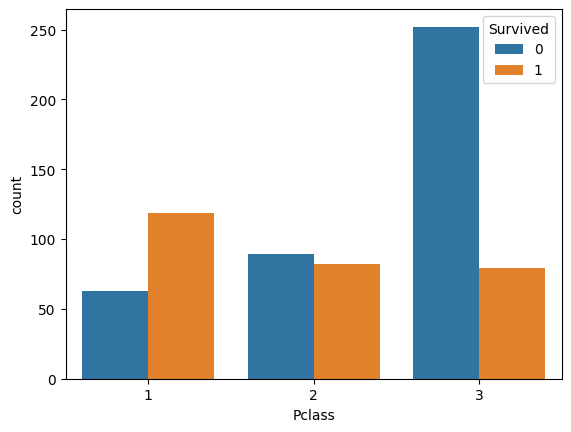

In [45]:
sns.countplot(x=df['Pclass'],hue=df['Survived'])

* From the above graph, we can see that Passengers of Class 1 has highest survival rate.

## Relation between Embarked and Survived column

In [46]:
df[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.607692
0,0,0.362816


<Axes: xlabel='Embarked', ylabel='count'>

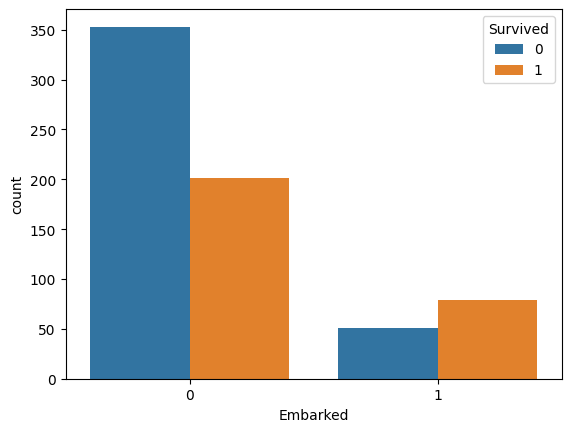

In [47]:
sns.countplot(x=df['Embarked'], hue=df['Survived'])

* From the above graph, we can see the survival rate of passengers who boarded from Southampton is less than passengers who boarded from Cherbourg.

## Relation between Fare and Survived columns

In [48]:
fare_survived=df[['Fare', 'Survived']].groupby(['Fare'],as_index=False).mean().sort_values(by='Survived', ascending=False)
fare_survived

,Fare,Survived
210,512.3292,1.0
168,65.0000,1.0
160,56.9292,1.0
161,57.0000,1.0
162,57.9792,1.0
...,...,...
86,16.1000,0.0
89,17.8000,0.0
90,18.0000,0.0
95,20.2125,0.0


## Relation between Passenger Class and Fare

In [49]:
df[['Pclass', 'Fare']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Fare
0,1,88.026672
1,2,21.578241
2,3,13.261957


<Axes: xlabel='Pclass', ylabel='Fare'>

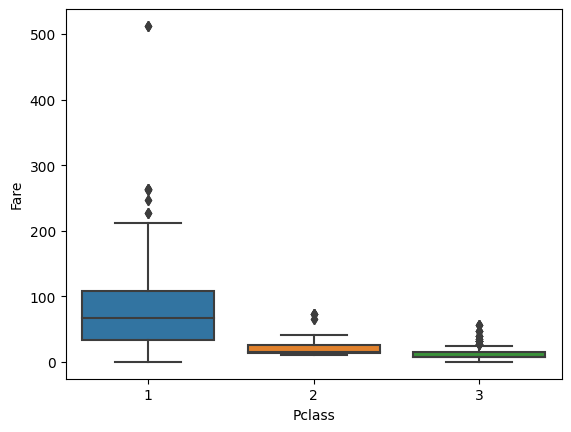

In [50]:
sns.boxplot(x='Pclass',y='Fare',data=df)

* From the above graph, we can see that Fare of Passenger Class 1 is highest

## Relation between Fare and Embarked columns

In [51]:
d3=df[['Embarked', 'Fare']].groupby(['Embarked'],as_index=False).mean()
d3

,Embarked,Fare
0,0,27.476284
1,1,68.296767


<Axes: xlabel='Embarked', ylabel='Fare'>

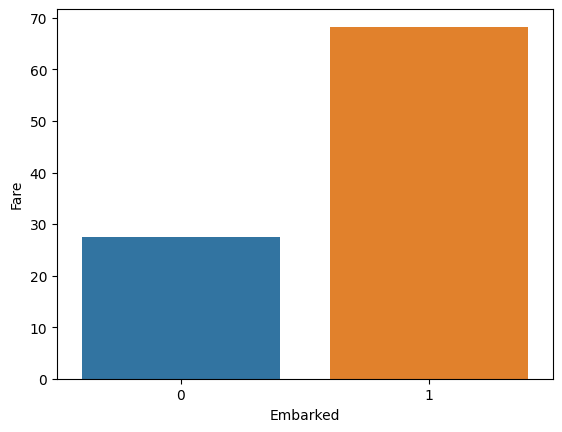

In [52]:
sns.barplot(x='Embarked',y='Fare',data=d3)

* From above graph, we can see average fare of Southampton is lower than Cherbourg

## Embarked - count male female-groupby

In [53]:
d4=df[['Embarked','Sex']].groupby('Embarked').value_counts()
d4

Embarked  Sex
0         0      368
          1      186
1         0       69
          1       61
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

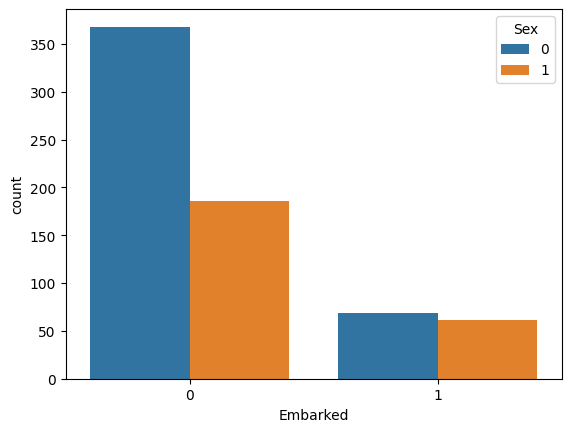

In [54]:
sns.countplot(x='Embarked',hue='Sex', data=df)

* From above graph we can see that number of Passenger who boarded the ship from Embarked value Southampton is more than Cherbourg.
* No of male is more than Female for both Southampton  and Cherbourg.

## Pclass- count male female-groupby

In [55]:
df[['Pclass','Sex']].groupby('Pclass').value_counts()

Pclass  Sex
1       0      100
        1       82
2       0       98
        1       73
3       0      239
        1       92
Name: count, dtype: int64

* From above we can see that number of males passengers is more number of female passengers in all the classes.

<Axes: xlabel='Pclass', ylabel='count'>

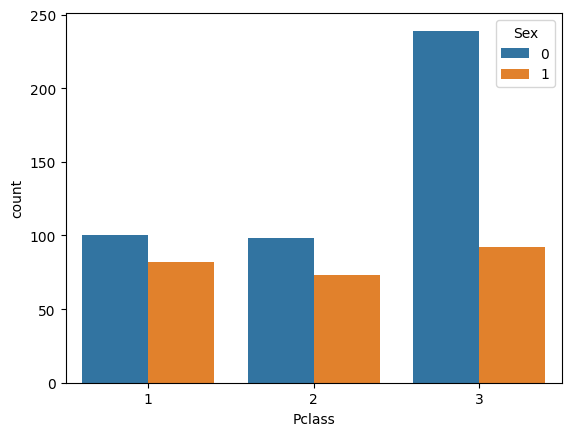

In [56]:
sns.countplot(x='Pclass',hue='Sex',data=df)

#### From the above we can see that number of Male passengers in Pclass 1 is 100 and female passengers is 82.
#### In Pclass 2, count of Male passengers is 98 and female passengers is 73.
#### In Pclass 3, count of Male passengers is 239 and female passengers is 92.

## Pclass- Passengers Average age based on Pclass

In [57]:
df[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.101209
2,29.718304
3,25.082840


<Axes: xlabel='Pclass'>

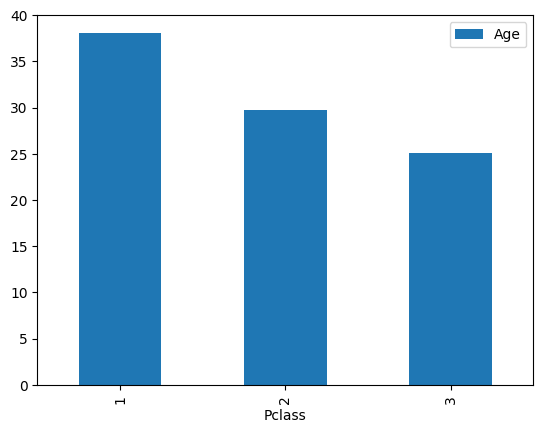

In [58]:
df[['Pclass','Age']].groupby('Pclass').mean().plot(kind='bar')

* From above graph, we can see that average age of passengers of Pclass 1 is 38, Pclass 2 is 29 and for Pclass 3, its 25.


## Embarked- Passengers average age based on embarked

In [59]:
df[['Embarked','Age']].groupby('Embarked').mean()

,Age
Embarked,
0,29.445397
1,30.814769


<Axes: xlabel='Embarked'>

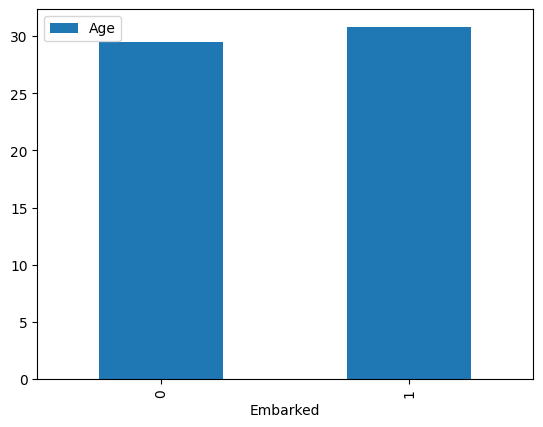

In [60]:
df[['Embarked','Age']].groupby('Embarked').mean().plot(kind='bar')

* Average age of passengers from Sothampton is 29 and from Cherbourg is 30

## Pclass- Average age of Passengers who survived in each Pclass

In [61]:
df[df['Survived']==1].groupby(['Pclass','Survived'])['Age'].mean()


Pclass  Survived
1       1           35.142185
2       1           25.851585
3       1           20.733165
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

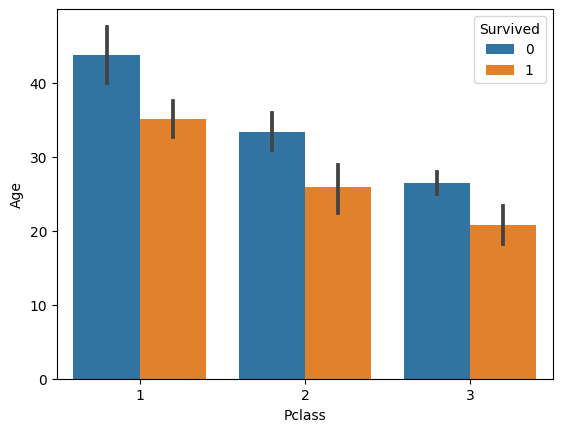

In [62]:
sns.barplot(x='Pclass',y='Age',hue='Survived',estimator='mean',data=df)

#### From the above graph, we observe that:
#### In Pclass 1- Average age of Passengers who survived is 35
#### In Pclass 2- Average age of Passengers who survived is 25
#### In Pclass 3- Average age of Passengers who survived is 20

## Pclass average age of passengers based on each Pclass and gender

In [63]:
df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex
1       0      41.254200
        1      34.256098
2       0      30.472755
        1      28.705479
3       0      26.411799
        1      21.630435
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

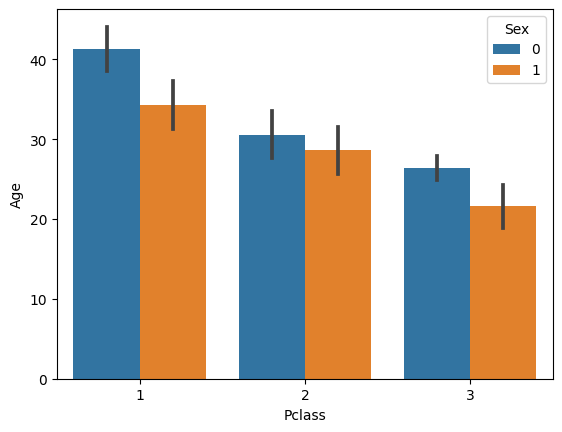

In [110]:
sns.barplot(x='Pclass',y='Age',hue='Sex',data=df)

#### From the above graph, we can conclude that:
##### In Pclass 1- Average age of Male passengers is 41 and average age of Female passengers is 34.
##### In Pclass 2- Average age of Male passengers is 30 and average age of female passengers is 28.
##### In Pclass 3- Average age of Male Passengers is 26 and average age of female passengers is 21.

## Pclass average age of passengers based on each Pclass and gender and survival rate

In [65]:
survival_rate=df.groupby(['Pclass','Sex','Survived'])['Age'].mean()
survival_rate

Pclass  Sex  Survived
1       0    0           44.591667
             1           36.248000
        1    0           25.666667
             1           34.582278
2       0    0           33.084337
             1           16.022000
        1    0           36.000000
             1           28.052239
3       0    0           27.202970
             1           22.092432
        1    0           23.390000
             1           19.535714
Name: Age, dtype: float64

<Axes: title={'center': 'Average Age of survived people'}, xlabel='Pclass,Sex,Survived'>

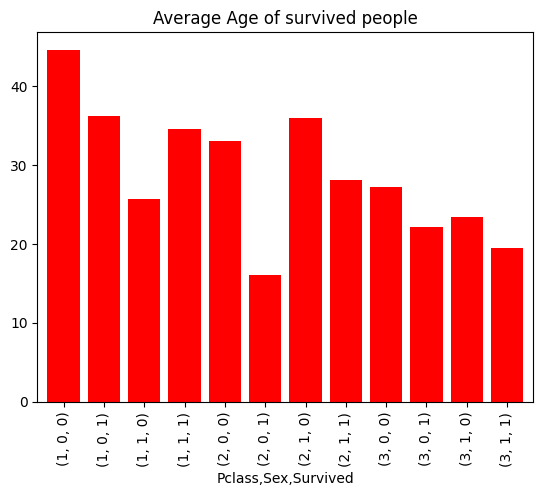

In [113]:
survival_rate.plot(kind='bar',color='red',width=0.8,title='Average Age of survived people')

<Axes: xlabel='Pclass', ylabel='Age'>

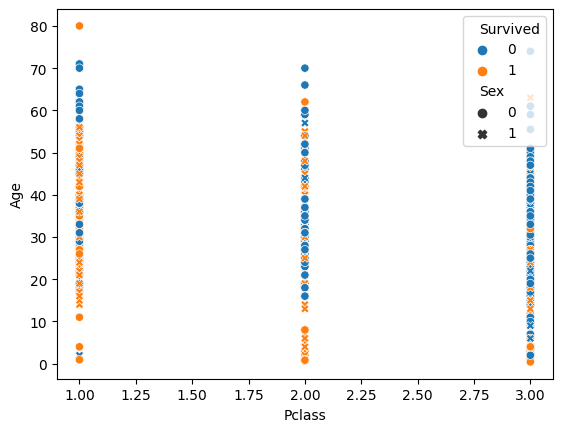

In [114]:
sns.scatterplot(x='Pclass',y='Age',data=df,hue='Survived',style='Sex',sizes=(15,200))

#### From the above graph, we can conclude that:
##### Survival rate of Female passengers is more tahn Male paseengers in all the classes.
##### Average age of Male Passengers who survived in Pclass 1 is 36 whereas average age of female passengers who survived is 34.
##### Average age of Male Passengers who survived in Pclass 2 is 16 whereas average age of female passengers who survived is 28.
##### Average age of Male Passengers who survived in Pclass 3 is 22 whereas average age of female passengers who survived is 19.
 

<Axes: >

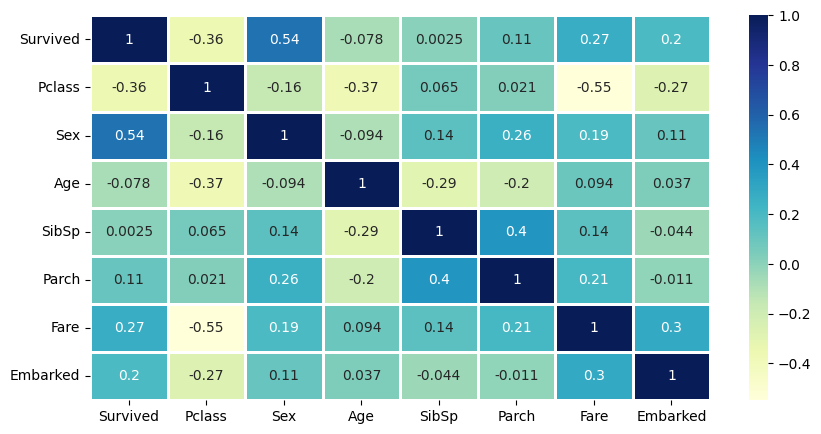

In [118]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidth=0.9)

* From above correlation matrix, we can see that Sex column is moderately correlated with survived column.
* There is no significant correlation with other columns

### Dividing Dependent and Independent features

In [68]:
x=df.drop('Survived',axis=1)
y=df['Survived']

### Train-Test Split

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [71]:
x_train

array([[-2.63933070e-01,  1.31201869e+00, -3.13920133e-01, ...,
         6.24008781e-01, -1.00994376e-01, -4.87397744e-01],
       [-1.45708505e+00, -7.62184266e-01,  1.10941761e+00, ...,
        -5.09987243e-01, -1.50355972e-03, -4.87397744e-01],
       [ 9.29218907e-01, -7.62184266e-01, -1.31025656e+00, ...,
        -5.09987243e-01, -3.03819972e-01,  2.05171241e+00],
       ...,
       [ 9.29218907e-01, -7.62184266e-01, -1.00419470e-01, ...,
        -5.09987243e-01, -4.71823782e-01, -4.87397744e-01],
       [ 9.29218907e-01, -7.62184266e-01, -7.40921457e-01, ...,
        -5.09987243e-01, -3.81377586e-01, -4.87397744e-01],
       [-2.63933070e-01, -7.62184266e-01, -4.56253907e-01, ...,
        -5.09987243e-01, -3.71504479e-01,  2.05171241e+00]])

In [72]:
x_test

array([[-1.45708505, -0.76218427,  2.03458715, -0.56544273,  1.7580048 ,
         1.40538703,  2.05171241],
       [-0.26393307, -0.76218427,  0.0419143 ,  0.55115356, -0.50998724,
        -0.20952981,  2.05171241],
       [ 0.92921891,  1.31201869,  0.39774874,  0.55115356,  0.62400878,
        -0.27736446, -0.48739774],
       [ 0.92921891, -0.76218427,  0.78916662, -0.56544273,  1.7580048 ,
        -0.38137759, -0.48739774],
       [ 0.92921891, -0.76218427,  1.25175139, -0.56544273, -0.50998724,
        -0.4808684 , -0.48739774],
       [-1.45708505,  1.31201869, -0.52742079, -0.56544273, -0.50998724,
         2.09775266, -0.48739774],
       [-0.26393307, -0.76218427, -0.10041947, -0.56544273, -0.50998724,
        -0.40851144, -0.48739774],
       [-1.45708505,  1.31201869,  2.39042159,  0.55115356, -0.50998724,
         0.76653479, -0.48739774],
       [-0.26393307, -0.76218427, -1.87959165,  0.55115356,  0.62400878,
        -0.17335133, -0.48739774],
       [ 0.92921891, -0.7621

### Model Building

## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### Prediction

In [74]:
y_pred=model.predict(x_test)

In [75]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0], dtype=int64)

### Model evaluation

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [77]:
acc=accuracy_score(y_pred,y_test)
acc

0.8613138686131386

In [78]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[78, 11],
       [ 8, 40]], dtype=int64)

In [79]:
classR=classification_report(y_pred,y_test)
print(classR)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        89
           1       0.78      0.83      0.81        48

    accuracy                           0.86       137
   macro avg       0.85      0.85      0.85       137
weighted avg       0.86      0.86      0.86       137



## Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [81]:
y_pred=clf.predict(x_test)

In [82]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0], dtype=int64)

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
acc=accuracy_score(y_pred,y_test)
acc

0.8248175182481752

In [85]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[72, 10],
       [14, 41]], dtype=int64)

In [86]:
classR=classification_report(y_pred,y_test)
print(classR)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        82
           1       0.80      0.75      0.77        55

    accuracy                           0.82       137
   macro avg       0.82      0.81      0.82       137
weighted avg       0.82      0.82      0.82       137



## Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf_R=RandomForestClassifier(random_state=0)
clf_R.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [88]:
y_pred=clf_R.predict(x_test)

In [89]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
acc_r=accuracy_score(y_pred,y_test)
acc_r

0.8759124087591241

In [92]:
cm_r=confusion_matrix(y_pred,y_test)
cm_r

array([[77,  8],
       [ 9, 43]], dtype=int64)

In [93]:
classR_r=classification_report(y_pred,y_test)
print(classR_r)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90        85
           1       0.84      0.83      0.83        52

    accuracy                           0.88       137
   macro avg       0.87      0.87      0.87       137
weighted avg       0.88      0.88      0.88       137



## SVM

In [94]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [95]:
y_pred=classifier.predict(x_test)

In [96]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0], dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [98]:
acc_s=accuracy_score(y_pred,y_test)
acc_s

0.8467153284671532

In [99]:
con_s=confusion_matrix(y_pred,y_test)
con_s

array([[78, 13],
       [ 8, 38]], dtype=int64)

In [100]:
class_report_s=classification_report(y_pred,y_test)
print(class_report_s)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        91
           1       0.75      0.83      0.78        46

    accuracy                           0.85       137
   macro avg       0.83      0.84      0.83       137
weighted avg       0.85      0.85      0.85       137



#### n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
#### metric='minkowski': This is the default parameter and it decides the distance between the points.
#### p=2: It is equivalent to the standard Euclidean metric.

## KNN(K-Nearest Neighbor)

In [101]:
from sklearn.neighbors import KNeighborsClassifier 
cls=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
cls.fit(x_train,y_train)

KNeighborsClassifier()

In [102]:
y_pred=cls.predict(x_test)

In [103]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [105]:
acc_k=accuracy_score(y_pred,y_test)
acc_k

0.8394160583941606

In [106]:
con_k=confusion_matrix(y_pred,y_test)
con_k

array([[74, 10],
       [12, 41]], dtype=int64)

In [107]:
class_report_k=classification_report(y_pred,y_test)
print(class_report_k)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        84
           1       0.80      0.77      0.79        53

    accuracy                           0.84       137
   macro avg       0.83      0.83      0.83       137
weighted avg       0.84      0.84      0.84       137



## Conclusion

* Random forest algorithm gives better prediction as compared to other algorithms
* There is lot of scope of improvement